In [ ]:
#setup
import csv
from google.colab import files
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df.transpose()


,0,1,2,3,4,5,6,7,8,9,...,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055
Id,0.00000,1.00000,2.0000,3.0000,4.00000,5.0000,6.00000,7.0000,8.0000,9.00000,...,2046.0000,2047.00000,2048.0000,2049.0000,2050.0000,2051.00000,2052.00000,2053.00000,2054.0000,2055.0000
fixed acidity,8.00000,9.30000,7.1000,8.1000,8.50000,9.9000,7.20000,7.5000,11.6000,7.80000,...,8.0000,6.60000,11.9000,8.4000,11.9000,6.60000,9.70000,7.70000,9.1000,6.2000
volatile acidity,0.50000,0.30000,0.5100,0.8700,0.36000,0.5100,0.87000,0.4300,0.3800,0.78000,...,0.8700,0.63000,0.2800,0.3400,0.3800,0.31000,0.59000,0.43000,0.5000,0.3100
citric acid,0.39000,0.73000,0.0300,0.2200,0.30000,0.4400,0.00000,0.3200,0.5500,0.09000,...,0.2900,0.27000,0.4900,0.2400,0.4900,0.13000,0.21000,0.42000,0.0000,0.1800
residual sugar,2.20000,2.30000,2.1000,2.6000,2.30000,2.2000,2.30000,1.8000,2.2000,2.20000,...,2.6000,2.00000,4.2000,1.9000,2.3000,2.00000,1.80000,1.70000,1.7500,2.3000
chlorides,0.07300,0.09200,0.0590,0.0840,0.07900,0.1110,0.08000,0.0660,0.0840,0.04900,...,0.0840,0.09700,0.0980,0.0760,0.0810,0.05600,0.07900,0.07100,0.0580,0.0590
free sulfur dioxide,30.00000,30.00000,3.0000,11.0000,10.00000,30.0000,6.00000,18.0000,17.0000,13.00000,...,12.0000,22.00000,9.0000,16.0000,24.0000,29.00000,27.00000,19.00000,5.0000,12.0000
total sulfur dioxide,39.00000,67.00000,12.0000,65.0000,45.00000,134.0000,18.00000,40.0000,40.0000,29.00000,...,44.0000,71.00000,17.0000,36.0000,42.0000,42.00000,65.00000,37.00000,13.0000,28.0000
density,0.99572,0.99854,0.9966,0.9973,0.99444,0.9982,0.99552,0.9956,1.0008,0.99682,...,0.9979,0.99852,1.0014,0.9956,0.9994,0.99388,0.99745,0.99258,0.9967,0.9952
pH,3.33000,3.32000,3.5200,3.2000,3.20000,3.1100,3.34000,3.3000,3.1700,3.51000,...,3.3000,3.47000,3.1200,3.2000,3.1500,3.52000,3.14000,3.32000,3.2200,3.5600


In [ ]:
#Project1: data cleaning
#task 1: get rid of errors and inconsistency
df = df.loc[df["fixed acidity"] >= 0]
df = df.loc[df["volatile acidity"] >= 0]
df = df.loc[df["citric acid"] >= 0]
df = df.loc[df["citric acid"] >= 0]
df = df.loc[df["residual sugar"] >= 0]
df = df.loc[df["chlorides"] >= 0]
df = df.loc[df["free sulfur dioxide"] >= 0]
df = df.loc[df["total sulfur dioxide"] >= 0]
df = df.loc[df["density"] >= 0]
df = df.loc[df["pH"] >= 0]
df = df.loc[df['pH'] < 14]    # in particular, pH-value cannot never exceed 14 
df = df.loc[df["sulphates"] >= 0]
df = df.loc[df["alcohol"] >= 0]
#make sure all values are in correct range

In [ ]:
#task 2: all data types converted optimally
df = df.astype({'Id': 'int32', 'fixed acidity' : 'float32','volatile acidity' : 'float32', 'citric acid': 'float32', 'residual sugar': 'float32', 'chlorides': 'float32','free sulfur dioxide': 'float32', 'total sulfur dioxide': 'float32', 'density':'float32','pH':'float32', 'sulphates': 'float32','alcohol':'float32','quality' : 'int16'})
# reduce unnecessary memory cost by modifying the data types

In [ ]:
#task 3: handle missing value and outliers
df = df.loc[df["fixed acidity"] > 8.365175 - 3*1.705390]
df = df.loc[df["fixed acidity"] < 8.365175 + 3*1.705390]
df = df.loc[df["volatile acidity"] > 0.527601 - 3*0.173164]
df = df.loc[df["volatile acidity"] < 0.527601 + 3*0.173164]
df = df.loc[df["citric acid"] > 0.265058 - 3*0.188267]
df = df.loc[df["citric acid"] < 0.265058 + 3*0.188267]
df = df.loc[df["residual sugar"] > 2.398881 - 3*0.858824]
df = df.loc[df["residual sugar"] < 2.398881 + 3*0.858824]
df = df.loc[df["chlorides"] > 0.081856 - 3*0.023729]
df = df.loc[df["chlorides"] < 0.081856 + 3*0.023729]
df = df.loc[df["free sulfur dioxide"] > 16.955982 - 3*10.009709]
df = df.loc[df["free sulfur dioxide"] < 16.955982 + 3*10.009709]
df = df.loc[df["total sulfur dioxide"] > 49.236866 - 3*32.961143]
df = df.loc[df["total sulfur dioxide"] < 49.236866 + 3*32.961143]
df = df.loc[df["density"] > 0.996748 - 3*0.001827]
df = df.loc[df["density"] < 0.996748 + 3*0.001827]
df = df.loc[df["pH"] > 3.310569 - 3*0.142321]
df = df.loc[df["pH"] < 3.310569 + 3*0.142321]
df = df.loc[df["sulphates"] > 0.641308 - 3*0.137942]
df = df.loc[df["sulphates"] < 0.641308 + 3*0.137942]
df = df.loc[df["alcohol"] > 10.414972 - 3*1.028825]
df = df.loc[df["alcohol"] < 10.414972 + 3*1.028825]
df = df.drop_duplicates()
# we define data points more than 2 standard deviation away from the mean to be outliers

df = df.dropna()
# drop rows with any column having NA/null data

Training data shape:
(2056, 13)
Epoch 1/200
17/17 [==============================] - 1s 14ms/step - loss: 0.5771
Epoch 2/200
17/17 [==============================] - 0s 12ms/step - loss: 0.3287
Epoch 3/200
17/17 [==============================] - 0s 14ms/step - loss: 0.2848
Epoch 4/200
17/17 [==============================] - 0s 14ms/step - loss: 0.2371
Epoch 5/200
17/17 [==============================] - 0s 13ms/step - loss: 0.1936
Epoch 6/200
17/17 [==============================] - 0s 13ms/step - loss: 0.1706
Epoch 7/200
17/17 [==============================] - 0s 14ms/step - loss: 0.1472
Epoch 8/200
17/17 [==============================] - 0s 14ms/step - loss: 0.1306
Epoch 9/200
17/17 [==============================] - 0s 13ms/step - loss: 0.1456
Epoch 10/200
17/17 [==============================] - 0s 14ms/step - loss: 0.1277
Epoch 11/200
17/17 [==============================] - 0s 14ms/step - loss: 0.1125
Epoch 12/200
17/17 [==============================] - 0s 13ms/step - loss: 

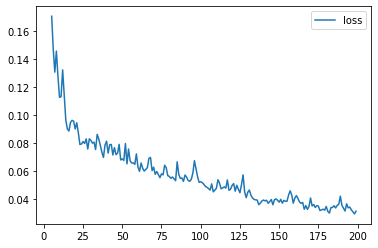

In [ ]:
#Project2: feature engineering

#task 4: feature engineering
#Load training,test, and submission data
print("Training data shape:")
print(df.shape)

#test_file_path = 'C:/Users/kaush/Desktop/Visual_Studio_Files/HackAI/hack-ai-wine-challenge/test.csv'
#test_data = pd.read_csv(test_file_path)
#print("Test data shape:")
#print(test_data.shape)

#sample_file_path = 'C:/Users/kaush/Desktop/Visual_Studio_Files/HackAI/hack-ai-wine-challenge/sample_submission.csv'
#sample_data = pd.read_csv(sample_file_path)

#Create x and y. Create preprocessor.
X = df.copy()
y = X.pop('quality')
X.pop('Id')
preprocessor = make_column_transformer((StandardScaler(), 
    make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)))

X = preprocessor.fit_transform(X)
y = np.log(y)

#Create model and stuff
input_shape = [11]
model = tf.keras.Sequential([
    layers.Dense(512, activation = 'relu', input_shape = input_shape),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(1)])

model.compile(optimizer = "adam", loss = "mae")
history = model.fit(X, y, batch_size = 128, epochs = 200)

#Plots loss curve
history_df = pd.DataFrame(history.history)
history_df.loc[5:, ['loss']].plot()


#Prints weights and biases
#w, b = model.weights
#print("Weights\n{}\n\nBias\n{}".format(w, b))

[[  0   0   2   2   0   0]
 [  0   0  11   6   2   0]
 [  3  11 150  84  15   6]
 [  1   2  75  89  46   4]
 [  0   0  12  44  36   1]
 [  0   1   1   5   8   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        19
           5       0.60      0.56      0.58       269
           6       0.39      0.41      0.40       217
           7       0.34      0.39      0.36        93
           8       0.00      0.00      0.00        15

    accuracy                           0.45       617
   macro avg       0.22      0.23      0.22       617
weighted avg       0.45      0.45      0.45       617



Text(0, 0.5, 'Error rate')

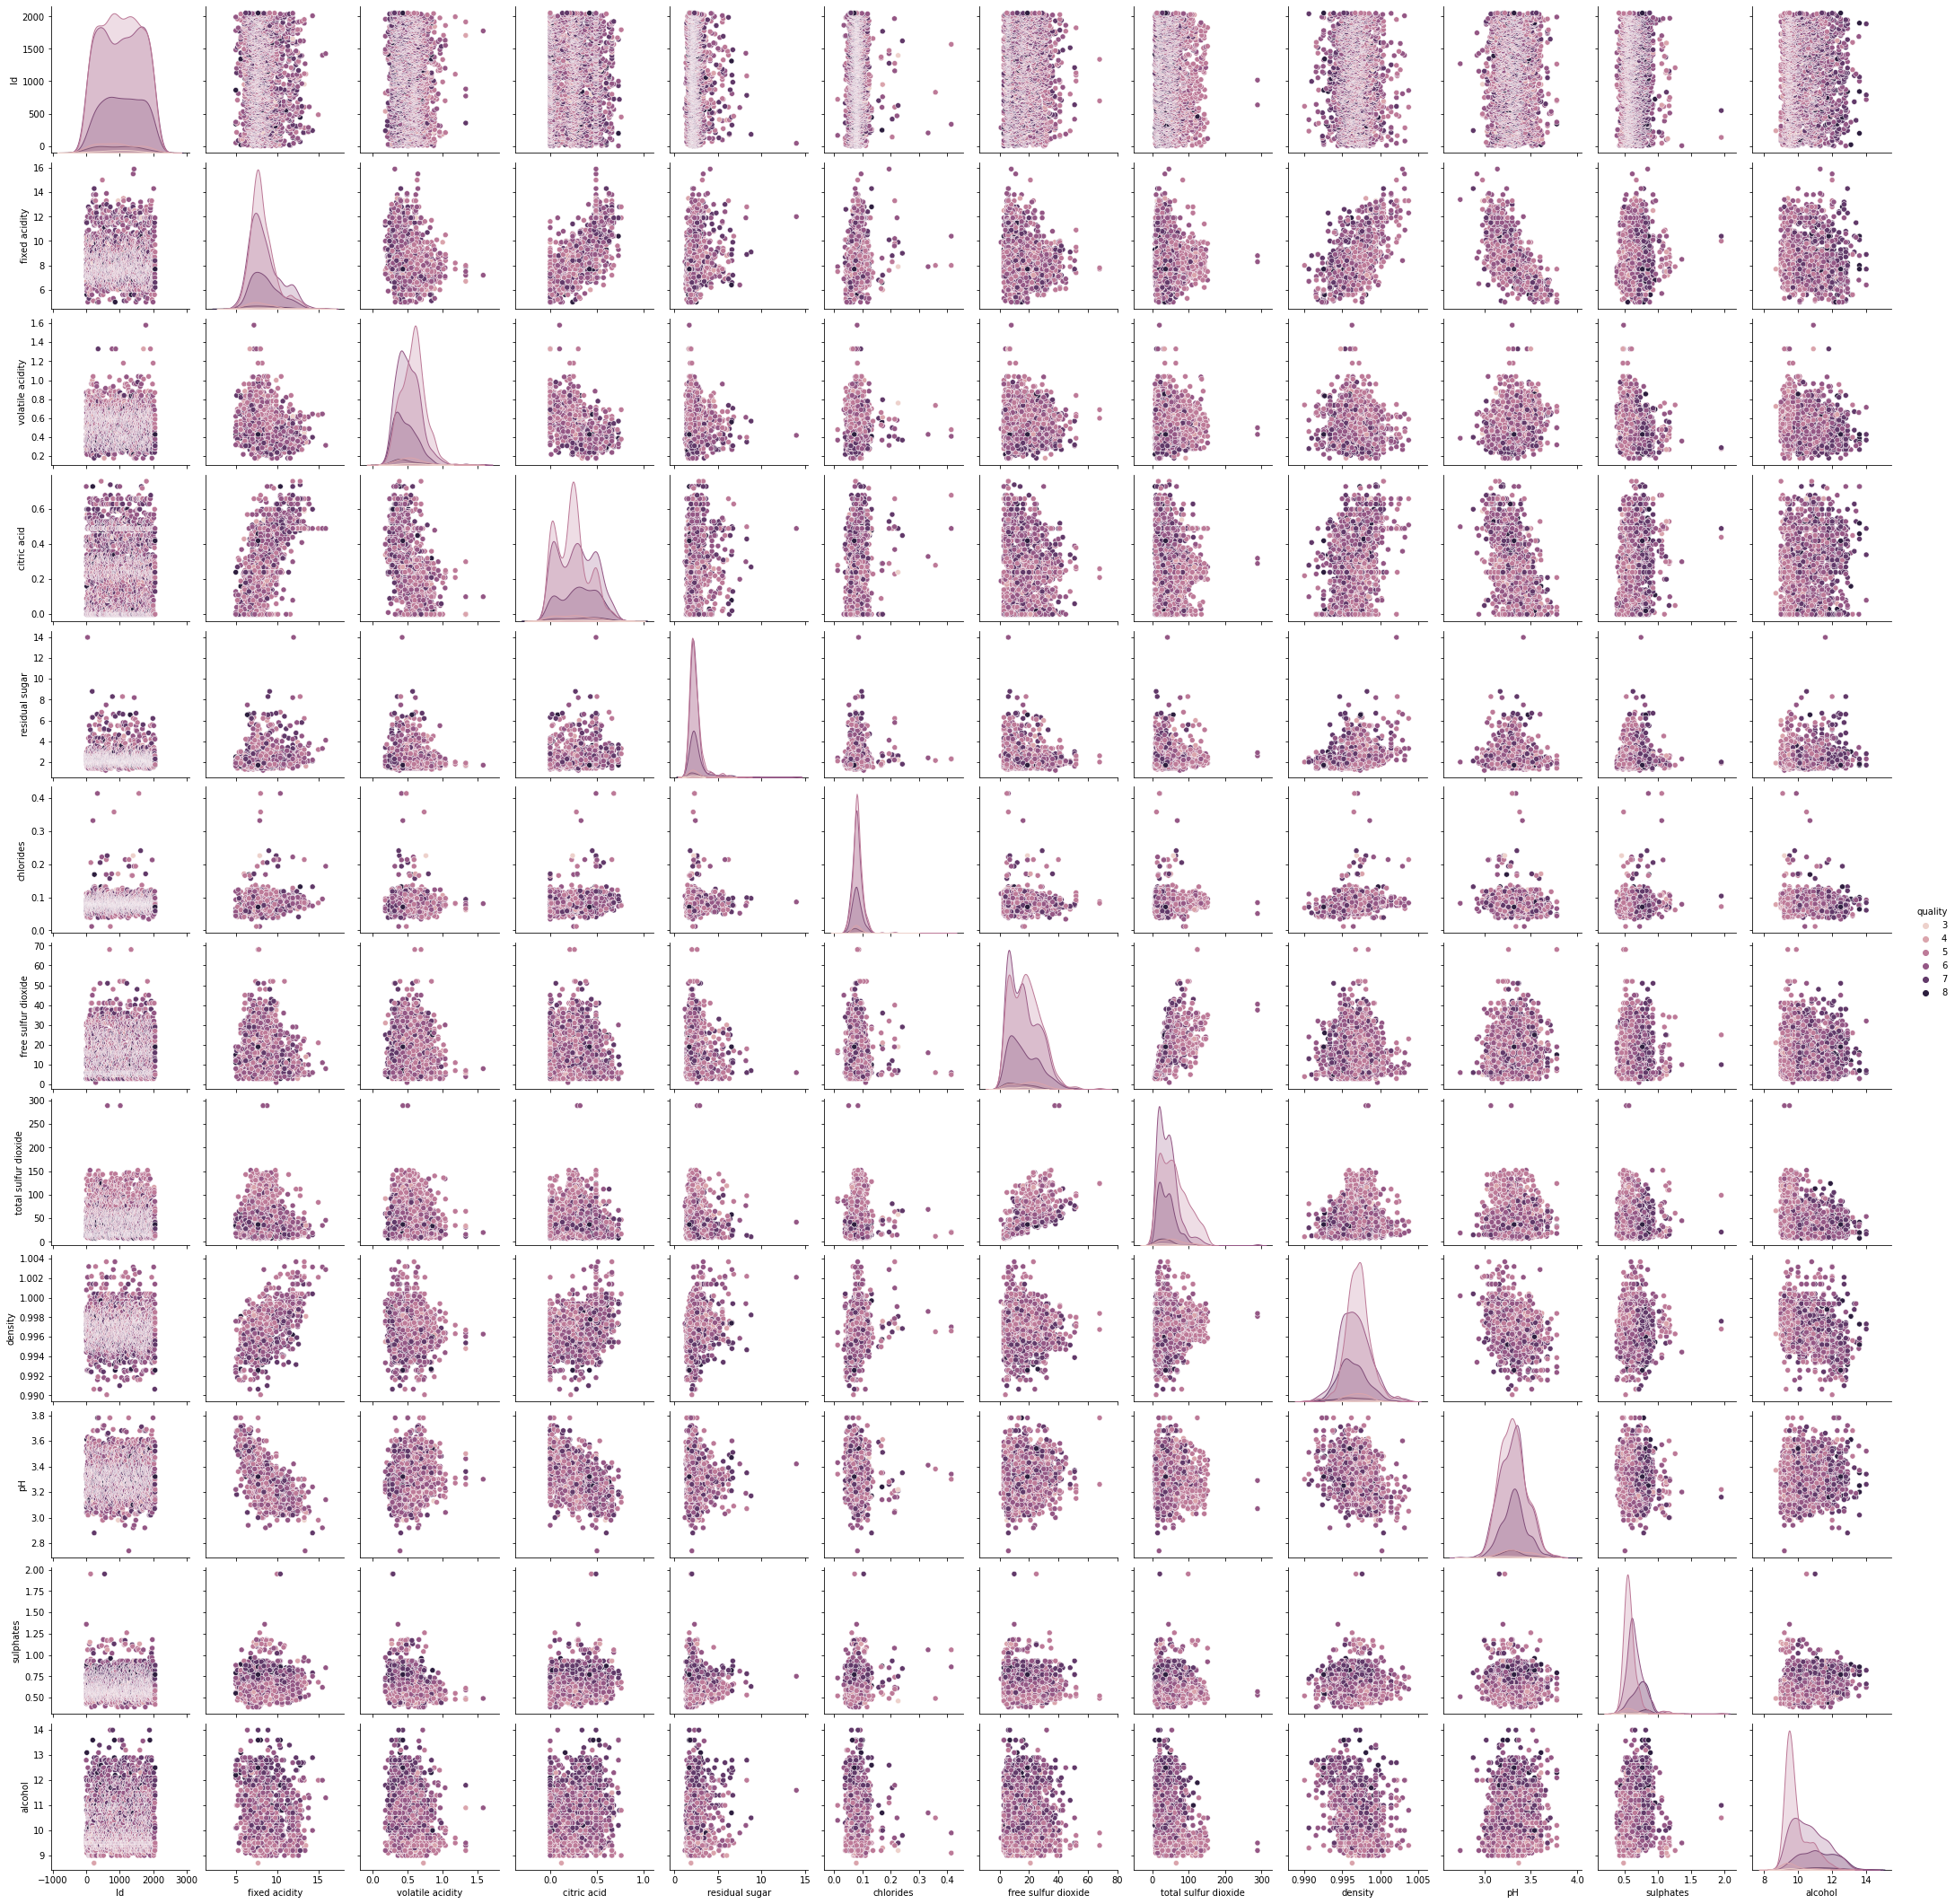

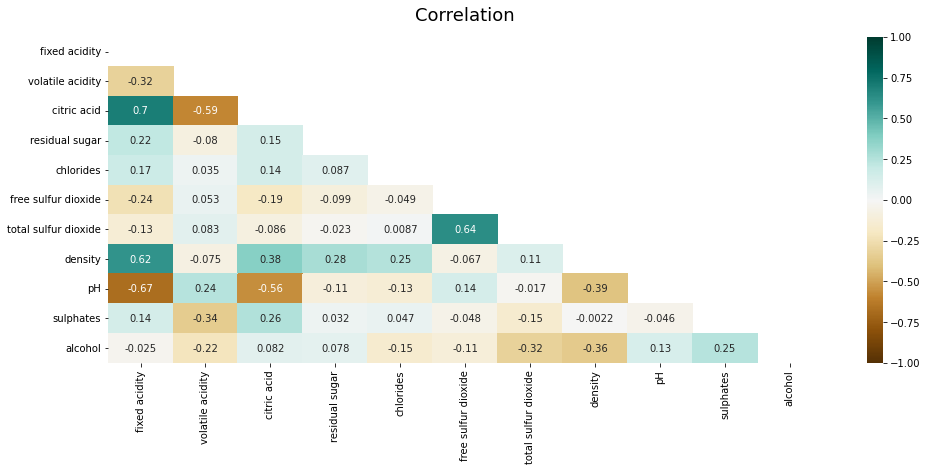

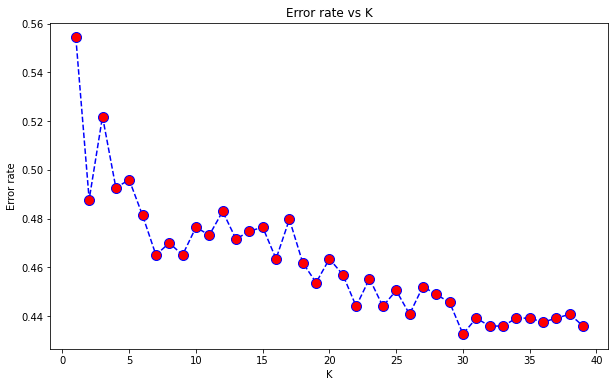

In [ ]:
#task 5:
# correlation ananlysis, KNN algorithm, and error rate
import seaborn as sns
sns.pairplot(df, hue='quality')
good_df = df.copy()
good_df.pop('Id')
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(good_df.iloc[:,:-1].corr(), dtype=bool))
heatmap = sns.heatmap(good_df.iloc[:,:-1].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('quality', axis=1))
scaled_features = scaler.transform(df.drop('quality',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['quality'],
                                                    test_size=0.30)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
#Predicting data, pre-tuning
X_test = preprocessor.transform(test_df)

y_pred = model.predict(X_test)

y_pred = np.exp(y_pred)

test_df['quality'] = y_pred

for i in range (len(test_df)):
    test_df.iat[i,12] = round(test_df.iat[i,12], 0)


df = df.astype({'Id':  'int32', 'quality' : 'int16'})

output_data = {'Id' : test_df['Id'], 'quality' : test_df['quality']}

output = pd.DataFrame(output_data)
output_csv = output.to_csv('submission.csv', index = False)
files.download('submission.csv')


43/43 [==============================] - 0s 3ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>